In [1]:
import pandas as pd
import json
import numpy as np
import sys
sys.path.append("..")
from scoring import bootstrap_roc_auc
import matplotlib.pyplot as plt

In [2]:
def get_data(path):
    data = np.loadtxt(path)
    return data

In [4]:
labels = get_data(path = "leave_one_out_labels_100.txt")

In [5]:
preds_with_traj = get_data(path = "leave_one_out_with_traj_100.txt")

In [6]:
preds_without_traj = get_data(path = "leave_one_out_without_traj_100.txt")

Without trajectories

In [7]:
estimated_mean, estimated_std = bootstrap_roc_auc(10000, labels, preds_without_traj)
print(estimated_mean, estimated_std)

0.7367453693929855 0.0488908518724917


With trajectories

In [8]:
estimated_mean, estimated_std = bootstrap_roc_auc(10000, labels, preds_with_traj)
print(estimated_mean, estimated_std)

0.7314990061534898 0.049670325615729594


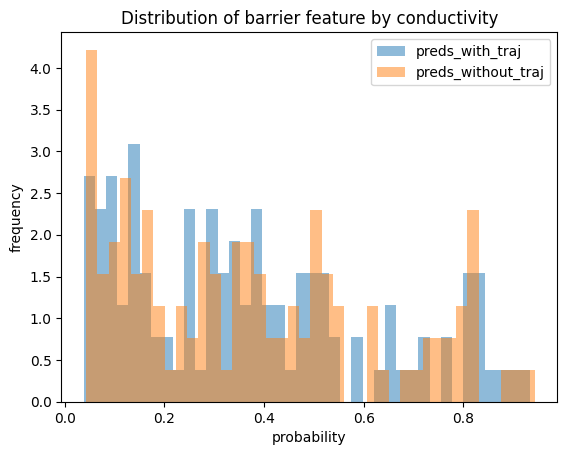

In [9]:

plt.hist(preds_with_traj, alpha=0.5, label='preds_with_traj', density = True, stacked = True, bins = 40)
plt.hist(preds_without_traj, alpha=0.5, label='preds_without_traj', density = True, stacked = True, bins = 40)

plt.legend(loc='upper right')
plt.title('Distribution of barrier feature by conductivity')
plt.xlabel('probability')
plt.ylabel('frequency')
plt.show()

In [22]:
from utils import *
from scoring import * 

dfs = []
for i in range(5):
    dfs.append(load_csv(f"../groups_and_oxi_states_5_frames/df_features_with_barrier_step_{i}.pkl"))
# preds_without_traj, preds_with_traj, y = test_function_leave_one_out(dfs)
# lenn =dfs[0].shape[0]
# indexes = np.array(lenn)
# preds_with_traj = np.zeros(lenn)
# preds_without_traj = np.zeros(lenn)

In [26]:
lenn =dfs[0].shape[0]

In [27]:
lenn

116

In [30]:
lenn =dfs[0].shape[0]
indexes = np.arange(lenn)
preds_with_traj = np.zeros(lenn)
preds_without_traj = np.zeros(lenn)
kf = KFold(n_splits=lenn, shuffle=False)
kf.get_n_splits(indexes)
for iteration, (train_index, test_index) in enumerate(kf.split(indexes)):
    print(train_index, test_index)
    assembled_pred = np.zeros(len(test_index))
    for i, df in enumerate(dfs):
        X, y = (df.drop(['is_good', 'stru_label', 'stru_id', 'barrier'], axis=1).to_numpy(), df['is_good'].astype(int).to_numpy())
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        if i == 0:
            X_tr, X_te, y_tr, y_te = (X_scaled[train_index, :], X_scaled[test_index, :], y[train_index], y[test_index])
            print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115] [0]
(115, 667) (1, 667) (115,) (1,)
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115] [1]
(115, 667) (1, 667) (115

In [25]:
dfs[0]

,0,1,2,3,4,5,6,7,8,9,...,895,898,899,900,901,902,stru_label,stru_id,is_good,barrier
0,0.462731,382.685013,235.809171,212.967900,215.204015,222.111684,222.111684,225.263941,225.263941,83.699032,...,0.000000,0.0,0.000000,0.0,0.0,0.0,Li24Al8N16,1537475,False,10.113724
1,0.407272,16162.599557,15066.748215,15021.653301,15021.652382,106.096553,42.168115,56.263530,56.263670,50.827315,...,0.000000,0.0,0.000000,0.0,0.0,0.0,Li12W2N8,153620,False,2.941376
2,0.388607,9427.992864,7150.390786,7289.864014,7394.941181,7395.003285,6476.843627,6858.374073,6816.789063,6816.703327,...,0.000000,0.0,0.000000,0.0,0.0,0.0,CsLi2I3,245988,True,0.316936
3,0.232286,4580.721388,3854.990327,3801.208738,3801.208738,3815.379037,3815.379037,153.717209,6.004575,5.362509,...,0.000000,0.0,0.000000,0.0,0.0,0.0,Li12Mo6O24,7024042,False,1.579071
4,0.200012,368.131252,123.177392,123.177207,116.153747,102.042546,103.273288,103.273213,96.338176,96.337351,...,0.000000,0.0,0.000000,0.0,0.0,0.0,Li4B4O8,2310701,False,2.016510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.160897,360.938909,243.977268,247.146307,230.918266,173.425285,125.767883,122.508148,96.703751,92.118949,...,0.000000,0.0,0.000000,0.0,0.0,0.0,Li8Al4B20O40,2012178,False,2.230530
112,0.271136,20140.016047,17934.466968,17559.335523,17679.950333,17679.960366,17423.486250,17491.683575,17491.689276,221.877955,...,0.000000,0.0,0.000000,0.0,0.0,0.0,Li4Au4F16,33953,True,1.040794
113,0.213501,698.661862,439.941963,423.080684,403.909636,391.713899,391.818074,385.084556,383.606142,336.272096,...,0.000000,0.0,0.000000,0.0,0.0,0.0,Li4B4S10,1510745,True,0.528198
114,0.218089,7934.705360,6600.398993,6817.126660,6735.727460,6773.471066,6773.547553,6708.835731,6708.838133,168.394568,...,0.411765,0.0,0.000000,0.0,0.0,0.0,Li4I4O16,1536985,True,0.976532
